# Problem Statement

- Subjective:

    The data contains several features for determining the values in suburbs of Boston.
- Objective:

    Predicting house prices in the suburbs of Boston with some of the features provided.

link Dataset: https://www.kaggle.com/datasets/shubhammeshram579/house

# Import Libraries

In [57]:
# print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.1.1.


In [53]:
# Data preparation
import pandas as pd 
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Model Definition
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Saving and Loading
import json
import joblib

In [2]:
# Data loading
df = pd.read_csv('Housing.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4
505,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6
506,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
507,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0


In [3]:
# Display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     509 non-null    float64
 1   ZN       509 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     509 non-null    int64  
 4   NOX      507 non-null    float64
 5   RM       509 non-null    float64
 6   AGE      508 non-null    float64
 7   DIS      509 non-null    float64
 8   RAD      508 non-null    float64
 9   TAX      509 non-null    int64  
 10  PTRATIO  509 non-null    float64
 11  B        509 non-null    float64
 12  LSTAT    508 non-null    float64
 13  MEDV     509 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.8 KB


In [4]:
# Display Describe
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,509.000000,509.000000,506.000000,509.000000,507.000000,509.000000,508.000000,509.000000,508.000000,509.000000,509.000000,509.000000,508.000000,509.000000
mean,3.707516,11.296660,11.198281,0.068762,0.555216,6.279845,68.579134,3.787705,9.610236,409.216110,18.463851,356.664892,12.705276,22.501572
std,8.732089,23.269781,6.856713,0.253298,0.115633,0.703449,28.114744,2.101852,8.735069,168.814161,2.161553,91.562469,7.131979,9.183497
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.880000,45.075000,2.100700,4.000000,279.000000,17.400000,375.330000,7.092500,17.000000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.202000,77.150000,3.182700,5.000000,330.000000,19.100000,391.450000,11.430000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.619000,94.100000,5.118000,24.000000,666.000000,20.200000,396.240000,16.992500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Data Cleaning


In [5]:
# Checking Missing Value
df.isna().sum()

CRIM       0
ZN         0
INDUS      3
CHAS       0
NOX        2
RM         0
AGE        1
DIS        0
RAD        1
TAX        0
PTRATIO    0
B          0
LSTAT      1
MEDV       0
dtype: int64

In [6]:
# Drop Missing Value
df.dropna()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4
505,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6
506,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
507,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0


<AxesSubplot: title={'center': 'Histogram of x_train'}>

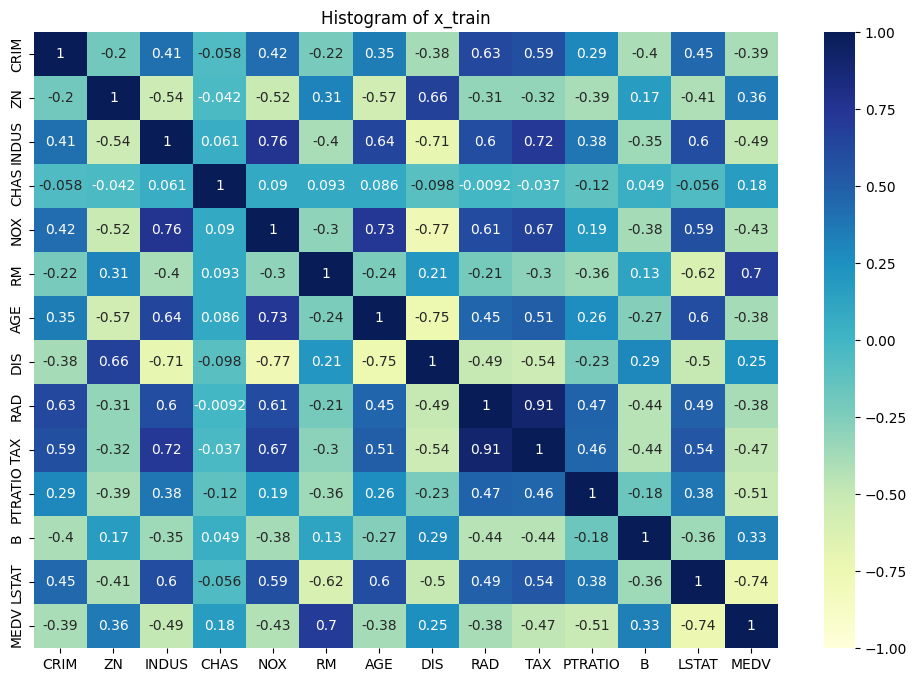

In [7]:
# Feature Selection
plt.figure(figsize=(12,8))
plt.title('Histogram of x_train')
sns.heatmap(df.corr(), vmin= -1, vmax= 1, cmap = 'YlGnBu', annot=True)

In [8]:
# df = df.drop(columns=['LSTAT', 'RM'])
# df

## Checking Outlier


In [9]:
# display variables
variables = df.columns.values
variables

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [10]:
# Create Function outlier
def outlier (df, variable):
    plt.figure(figsize= (8,5))
    
    plt.subplot(1,2,1)
    plt.title('Histogram ' + variable)
    sns.histplot(df[variable], color= 'lightblue')
    
    plt.subplot(1,2,2)
    plt.title('Boxplot ' + variable)
    sns.boxplot(y=df[variable], color= 'lightslategrey')
    plt.show()

    print(f'Nilai Skewness ' + variable, ':', df[variable].skew())

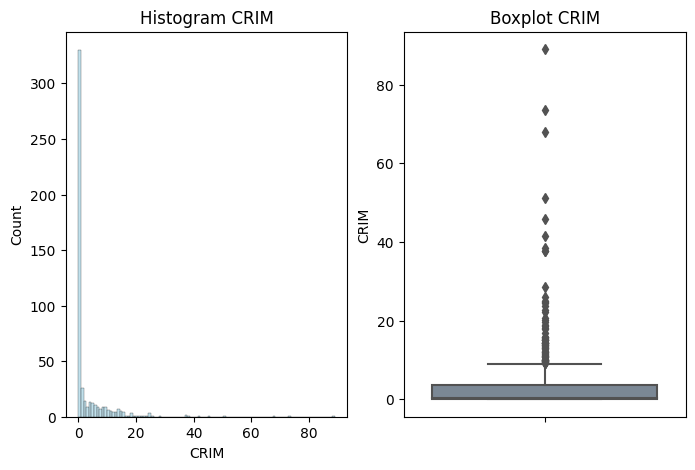

Nilai Skewness CRIM : 5.054175020042737


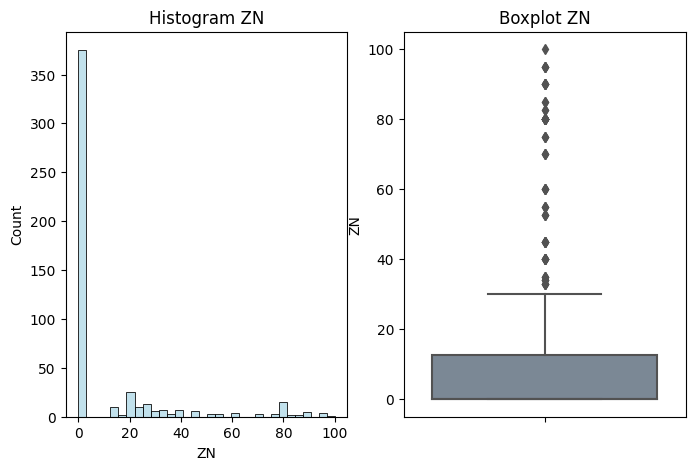

Nilai Skewness ZN : 2.2355074414730223


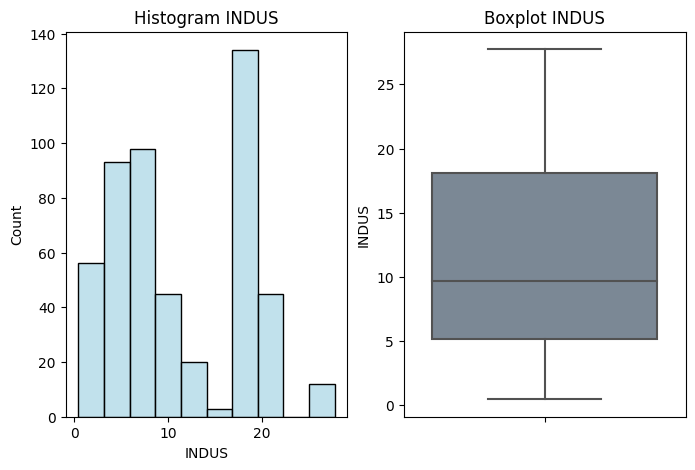

Nilai Skewness INDUS : 0.27778706026958316


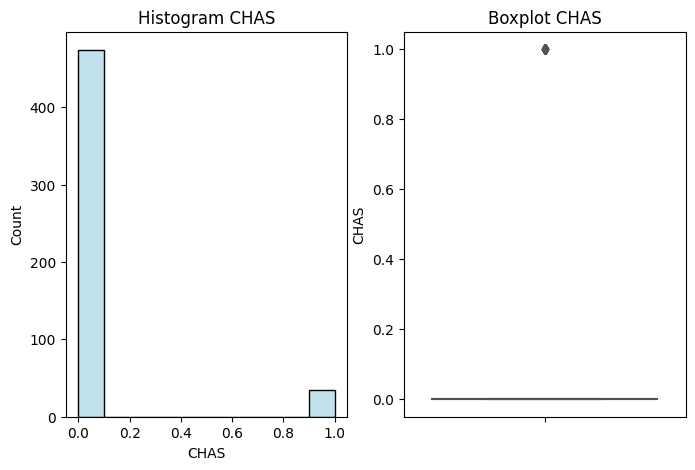

Nilai Skewness CHAS : 3.418409724023757


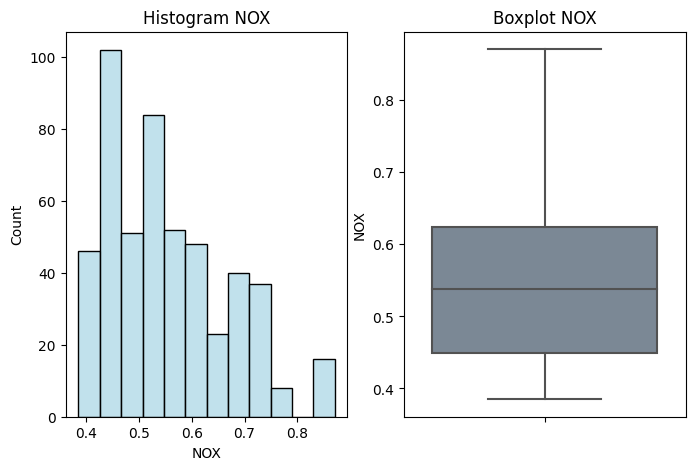

Nilai Skewness NOX : 0.7228821187882511


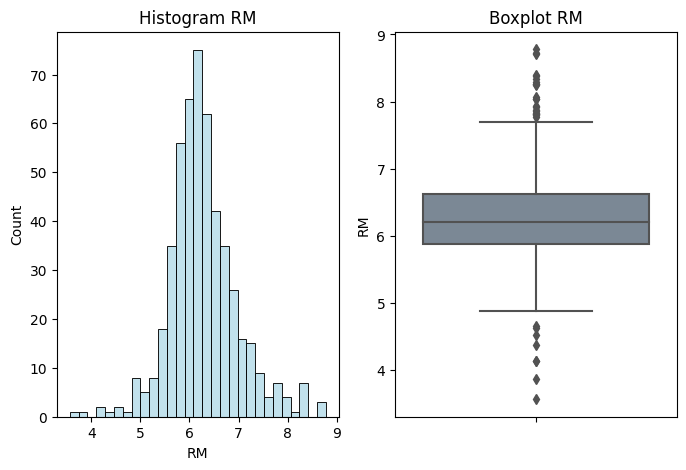

Nilai Skewness RM : 0.4098253546172994


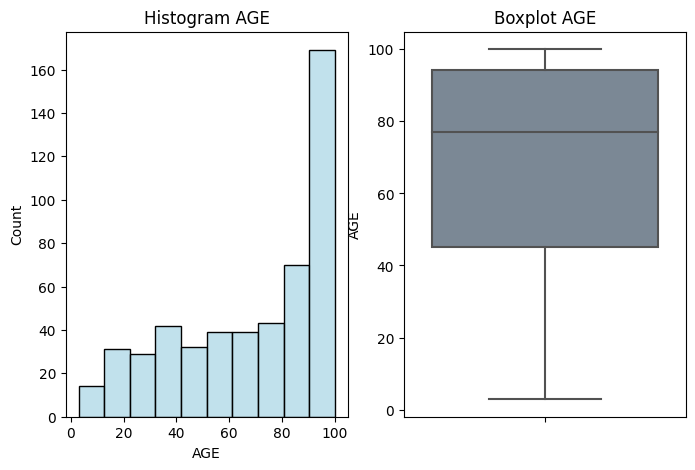

Nilai Skewness AGE : -0.5979065798164583


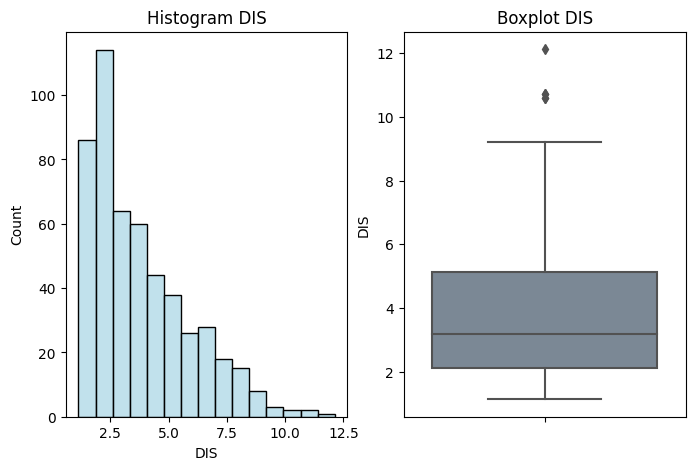

Nilai Skewness DIS : 1.0202374476221407


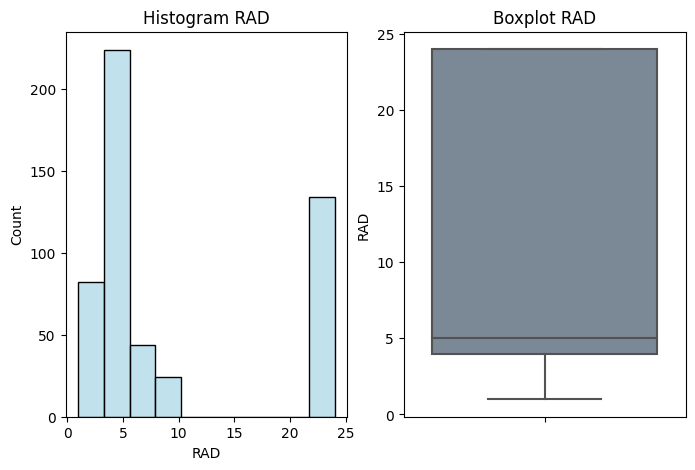

Nilai Skewness RAD : 0.9886377545477146


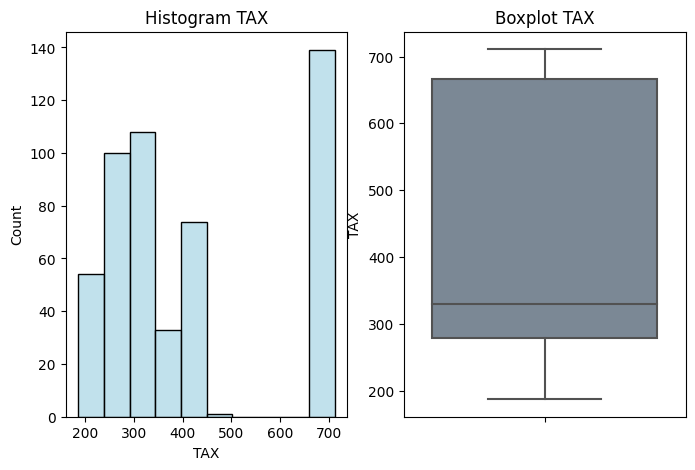

Nilai Skewness TAX : 0.6593129822381303


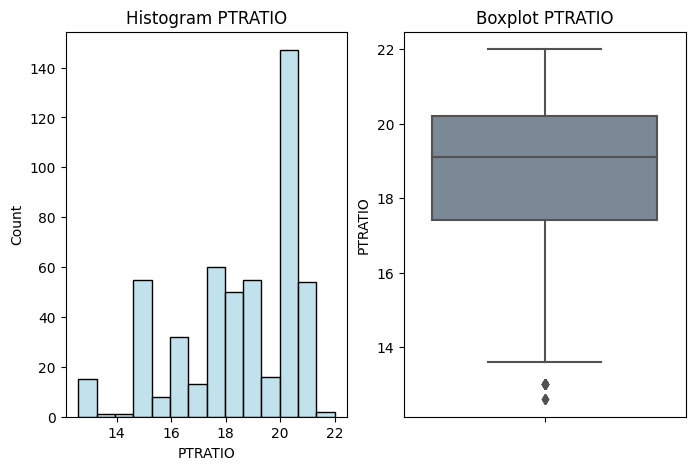

Nilai Skewness PTRATIO : -0.8107594483355054


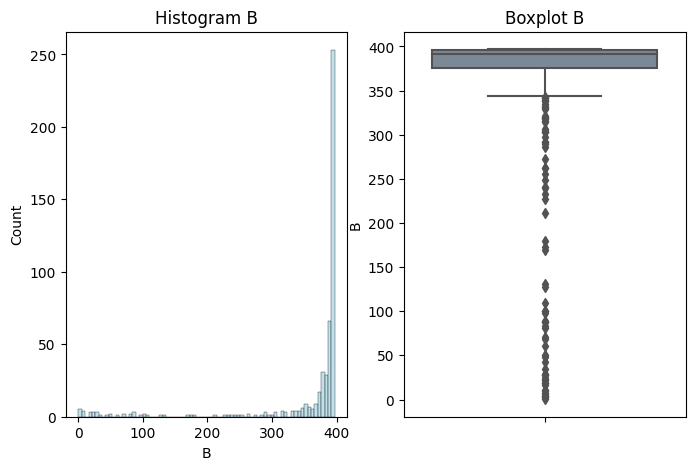

Nilai Skewness B : -2.9015478918910147


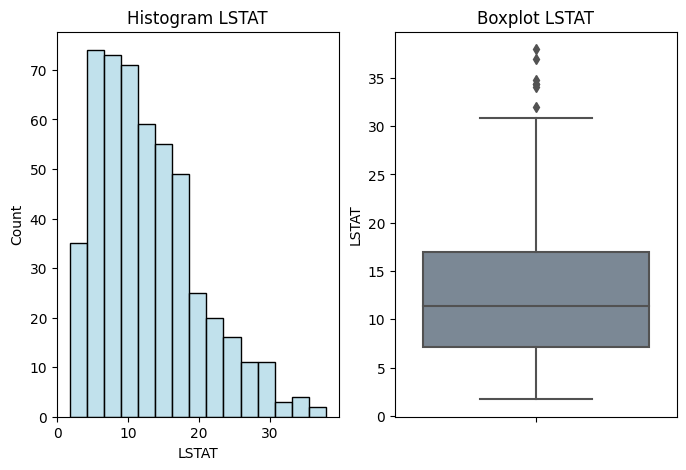

Nilai Skewness LSTAT : 0.9005800250333794


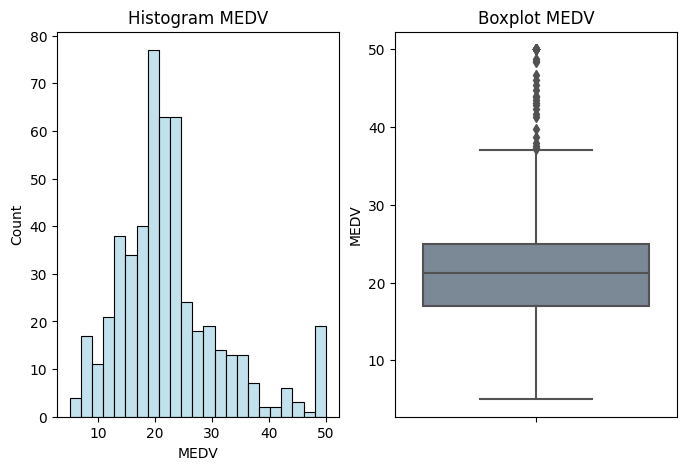

Nilai Skewness MEDV : 1.1134972059997783


In [11]:
# Visualization Outlier
for i in variables:
    outlier(df, i)

---
have outlier in: 
MEDV
LSTAT
B
PTRATIO
DIX
RM
ZN
CRIM

In [12]:
 var_out = df.columns.values
#var_out= ['MEDV','B','PTRATIO','DIS','ZN','CRIM']

## Handling Outlier

In [13]:
# Function Finding Limit Outlier
def find_outlier_limits(df, var_out, nilai):
    IQR = df[var_out].quantile(0.75) - df[var_out].quantile(0.25)
    
    lower_limit = df[var_out].quantile(0.25)-(IQR*nilai)
    upper_limit = df[var_out].quantile(0.25)+(IQR*nilai)
    
    return upper_limit, lower_limit

In [14]:
# Dropping Outlier
MEDV_upper_limit, MEDV_lower_limit = find_outlier_limits(df, 'MEDV', 3)
B_upper_limit, B_lower_limit = find_outlier_limits(df, 'B', 3)
PTRATIO_upper_limit, PTRATIO_lower_limit = find_outlier_limits(df, 'PTRATIO', 3)
DIS_upper_limit, DIS_lower_limit = find_outlier_limits(df, 'DIS', 3)
ZN_upper_limit, ZN_lower_limit = find_outlier_limits(df, 'ZN', 3)
CRIM_upper_limit, CRIM_lower_limit = find_outlier_limits(df, 'CRIM', 3)
LSTAT_upper_limit, LSTAT_lower_limit = find_outlier_limits(df, 'LSTAT', 3)
RM_upper_limit, RM_lower_limit = find_outlier_limits(df, 'RM', 3)

print('MEDV_upper_limit : ', MEDV_upper_limit)
print('MEDV_lower_limit : ', MEDV_lower_limit, '\n')
print('B_upper_limit : ', B_upper_limit)
print('B_lower_limit : ', B_lower_limit, '\n')
print('PTRATIO_upper_limit : ', PTRATIO_upper_limit)
print('PTRATIO_lower_limit : ', PTRATIO_lower_limit,'\n')
print('DIS_upper_limit : ', DIS_upper_limit)
print('DIS_lower_limit : ', DIS_lower_limit, '\n')
print('ZN_upper_limit : ', ZN_upper_limit)
print('ZN_lower_limit : ', ZN_lower_limit,'\n')
print('CRIM_upper_limit : ', CRIM_upper_limit)
print('CRIM_lower_limit : ', CRIM_lower_limit, '\n')
print('LSTAT_upper_limit : ', LSTAT_upper_limit)
print('LSTAT_lower_limit : ', LSTAT_lower_limit, '\n')
print('RM_upper_limit : ', RM_upper_limit)
print('RM_lower_limit : ', RM_lower_limit, '\n')



MEDV_upper_limit :  41.0
MEDV_lower_limit :  -7.0 

B_upper_limit :  438.06000000000006
B_lower_limit :  312.5999999999999 

PTRATIO_upper_limit :  25.8
PTRATIO_lower_limit :  8.999999999999996 

DIS_upper_limit :  11.152600000000001
DIS_lower_limit :  -6.951200000000002 

ZN_upper_limit :  37.5
ZN_lower_limit :  -37.5 

CRIM_upper_limit :  10.914909999999999
CRIM_lower_limit :  -10.75049 

LSTAT_upper_limit :  36.7925
LSTAT_lower_limit :  -22.607499999999995 

RM_upper_limit :  8.097
RM_lower_limit :  3.6630000000000003 



In [15]:
# Flag the outliers in category `MEDV`
outliers_MEDV = np.where(df['MEDV'] > MEDV_upper_limit, True,
                       np.where(df['MEDV'] < MEDV_lower_limit, True, False))

# Flag the outliers in category `B`
outliers_B = np.where(df['B'] > B_upper_limit, True,
                       np.where(df['B'] < B_lower_limit, True, False))

# Flag the outliers in category `PTRATIO`
outliers_PTRATIO = np.where(df['PTRATIO'] > PTRATIO_upper_limit, True,
                       np.where(df['PTRATIO'] < PTRATIO_lower_limit, True, False))

# Flag the outliers in category `DIS`
outliers_DIS = np.where(df['DIS'] > DIS_upper_limit, True,
                       np.where(df['DIS'] < DIS_lower_limit, True, False))

# Flag the outliers in category `ZN`
outliers_ZN = np.where(df['ZN'] > ZN_upper_limit, True,
                       np.where(df['ZN'] < ZN_lower_limit, True, False))

# Flag the outliers in category `CRIM`
outliers_CRIM = np.where(df['CRIM'] > CRIM_upper_limit, True,
                       np.where(df['CRIM'] < CRIM_lower_limit, True, False))

# Flag the outliers in category `LSTAT`
outliers_LSTAT = np.where(df['LSTAT'] > LSTAT_upper_limit, True,
                       np.where(df['LSTAT'] < LSTAT_lower_limit, True, False))

# Flag the outliers in category `RM`
outliers_RM = np.where(df['RM'] > RM_upper_limit, True,
                       np.where(df['RM'] < RM_lower_limit, True, False))

print(outliers_MEDV[:10])

[False False False False False False False False False False]


In [16]:
df_trimmed = df.loc[~(outliers_B + outliers_CRIM + outliers_DIS + outliers_LSTAT + outliers_MEDV
                      + outliers_PTRATIO + outliers_RM + outliers_ZN)]
# df_trimmed = df.loc[~(outliers_B + outliers_CRIM + outliers_DIS + outliers_MEDV
#                       + outliers_PTRATIO+ outliers_ZN)]

print(f'Size dataset- before trimming : ', df.shape)
print(f'Size dataset- After trimming : ', df_trimmed.shape)



Size dataset- before trimming :  (509, 14)
Size dataset- After trimming :  (336, 14)


In [17]:
# Display trimmed
df_trimmed

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4
505,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6
506,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
507,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0


In [18]:
df_trimmed.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,336.000000,336.000000,334.000000,336.000000,334.000000,336.000000,335.000000,336.000000,335.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,1.336810,4.688988,10.921467,0.068452,0.547852,6.198027,68.802090,3.779428,7.749254,373.419643,18.592560,386.554196,12.443482,21.681548
std,2.449226,9.777563,6.530961,0.252897,0.106646,0.510684,26.452782,1.747567,7.362093,151.596635,1.941942,16.370779,5.845857,5.687521
min,0.006320,0.000000,1.380000,0.000000,0.409000,4.903000,2.900000,1.321600,1.000000,188.000000,13.000000,314.640000,2.940000,6.300000
25%,0.091487,0.000000,5.860000,0.000000,0.464000,5.879750,49.600000,2.381700,4.000000,277.000000,17.800000,385.330000,7.982500,18.400000
50%,0.197295,0.000000,8.560000,0.000000,0.522000,6.143000,74.400000,3.412550,5.000000,307.000000,18.850000,393.235000,11.430000,21.200000
75%,0.831955,0.000000,18.100000,0.000000,0.594000,6.454500,92.600000,4.967100,7.000000,430.000000,20.200000,396.900000,15.702500,24.025000
max,10.233000,35.000000,27.740000,1.000000,0.871000,8.069000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,34.410000,39.800000


# Data Preprocessing

In [19]:
# model inference
data_inf = df_trimmed.sample(20, random_state=19)
data_inf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
107,0.13117,0.0,8.56,0,0.520,6.127,85.2,2.1224,5.0,384,20.9,387.69,14.09,20.4
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24.0,666,20.2,385.09,17.27,16.1
30,1.13081,0.0,8.14,0,0.538,5.713,94.1,4.2330,4.0,307,21.0,360.17,22.60,12.7
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5.0,296,16.6,395.50,9.04,23.6
207,0.25199,0.0,10.59,0,0.489,5.783,72.7,4.3549,4.0,277,18.6,389.43,18.06,22.5
296,0.05372,0.0,13.92,0,0.437,6.549,51.0,5.9604,4.0,289,16.0,392.85,7.39,27.1
24,0.75026,0.0,8.14,0,0.538,5.924,94.1,4.3996,4.0,307,21.0,394.33,16.30,15.6
317,0.24522,0.0,9.90,0,0.544,5.782,71.7,4.0317,4.0,304,18.4,396.90,15.94,19.8
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1.0,422,15.9,389.96,8.65,16.5
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5.0,287,19.6,396.90,6.87,23.1


In [20]:
# create train test
data_train_test = df_trimmed.drop(data_inf.index)
data_train_test.reset_index(drop= True, inplace = True)
data_inf.reset_index(drop=True, inplace=True)
data_train_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273,21.0,391.99,9.67,22.4
312,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273,21.0,396.90,9.08,20.6
313,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273,21.0,396.90,5.64,23.9
314,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273,21.0,393.45,6.48,22.0


In [21]:
# splitting feature and target
x = data_train_test.drop(['MEDV'], axis= 1)
y = data_train_test['MEDV']

In [22]:
# splitting train_set and test set 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 19)

print(f'Train size', x_train.shape)
print(f'Test size', x_test.shape)

Train size (252, 13)
Test size (64, 13)


In [23]:
#checking missing value
print(x_train.isna().sum())
print('\n')
print(y_train.isna().sum())

CRIM       0
ZN         0
INDUS      1
CHAS       0
NOX        2
RM         0
AGE        1
DIS        0
RAD        1
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


0


In [24]:
x_train = x_train.dropna()
x_test = x_test.dropna()
y_train = y_train.loc[x_train.index]
y_test = y_test.loc[x_test.index]

In [25]:
#checking missing value
print(x_train.isna().sum())
print('\n')
print(y_train.isna().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


0


<AxesSubplot: title={'center': 'Histogram of x_train'}>

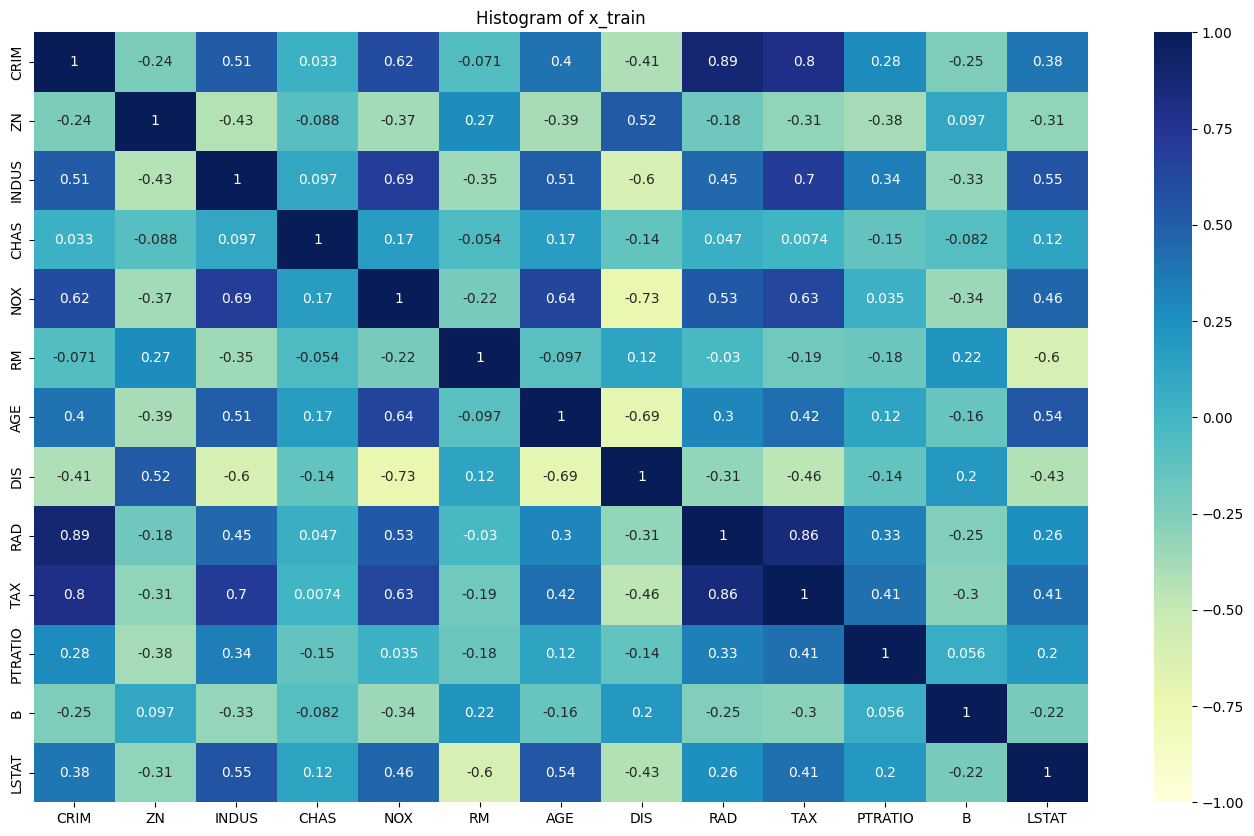

In [26]:
# Histogram for pearson
plt.figure(figsize=(17,10))
plt.title('Histogram of x_train')
sns.heatmap(x_train.corr(), vmin= -1, vmax= 1, cmap = 'YlGnBu', annot=True)

Terjadi korelasi yang tinggi antara
RAD >< CRIM
RAD <> TAX
TAX >< CRIM
NOX <> DIS
dihapus INDUS, AGE DIS

In [27]:
# dropping feature
x_train = x_train.drop(columns=['NOX', 'TAX', 'RAD'])
x_test= x_test.drop(columns=['NOX', 'TAX', 'RAD'])

In [28]:
#feature scaling
num_columns = x_train.select_dtypes(include=np.number).columns.tolist()
print(num_columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']


In [29]:
# Split Train-Set and Test-Set based on Column Types

x_train_num = x_train[num_columns]
x_test_num = x_test[num_columns]

#Feature scaling with MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train_num)

x_test_num_scaled = scaler.transform(x_test_num)
x_train_num_scaled = scaler.transform(x_train_num)
x_train_num_scaled

# Create Data Frame
x_test_final= pd.DataFrame(x_test_num_scaled, columns=[num_columns])
x_train_final = pd.DataFrame(x_train_num_scaled, columns=[num_columns])
x_train_final

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT
0,0.009759,0.857143,0.130053,0.0,0.364456,0.640577,0.661099,0.439024,0.972283,0.300604
1,0.009160,0.971429,0.174294,0.0,0.650032,0.152420,0.549775,0.378049,0.921347,0.061010
2,0.024176,0.000000,0.319603,0.0,0.238892,0.770340,0.345862,0.658537,0.994165,0.272005
3,0.400040,0.000000,0.688787,0.0,0.162589,1.000000,0.011892,0.207317,1.000000,0.746107
4,0.007506,0.000000,0.035850,0.0,0.206375,0.894954,0.219681,0.585366,0.928276,0.350810
...,...,...,...,...,...,...,...,...,...,...
242,0.034397,0.000000,0.178490,1.0,0.640052,0.881565,0.203043,0.536585,0.936786,0.215126
243,0.022764,0.000000,0.311594,0.0,0.339987,0.642636,0.143373,0.756098,1.000000,0.317127
244,0.121786,0.000000,0.252479,0.0,0.195428,0.980433,0.326469,0.975610,0.752857,0.574515
245,0.375819,0.000000,0.632342,1.0,0.461043,0.907312,0.156043,0.878049,0.932409,0.328249


In [30]:
x_train_final.describe()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,0.133627,0.142568,0.361579,0.080972,0.405361,0.688484,0.314457,0.678335,0.872627,0.300970
std,0.241998,0.287097,0.251889,0.273345,0.172568,0.279898,0.231671,0.244951,0.206343,0.182284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.009087,0.000000,0.165523,0.000000,0.299420,0.490731,0.129042,0.536585,0.852176,0.157293
50%,0.020872,0.000000,0.268497,0.000000,0.387637,0.770340,0.257149,0.719512,0.955628,0.271370
75%,0.090794,0.000000,0.632342,0.000000,0.489214,0.934089,0.458030,0.878049,1.000000,0.403082
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# MODEL DEFINITION


In [31]:
# Checking Missing Value
x_test_final.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
RM         0
AGE        0
DIS        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [32]:
# Creat model Linear Regression

model_lr = LinearRegression()
model_lr.fit(x_train_final, y_train)

# Check score deafault Linear Regression
print('Linear Regression')
print('Training set score: {:.5f}'.format(model_lr.score(x_train_final, y_train)))
print('Test set score: {:.5f}'.format(model_lr.score(x_test_final, y_test)))


Linear Regression
Training set score: 0.76478
Test set score: 0.71324


In [33]:
# Creat model Lasso
model_l2 = Lasso()
model_l2.fit(x_train_final, y_train)

# Check score deafault "asso
print('Lasso Regression')
print('Training set score: {:.5f}'.format(model_l2.score(x_train_final, y_train)))
print('Test set score: {:.5f}'.format(model_l2.score(x_test_final, y_test)))


Lasso Regression
Training set score: 0.00000
Test set score: -0.00538


In [34]:
# Random Forest regressor
model_rf = RandomForestRegressor()
model_rf.fit(x_train_final, y_train)

# Check score deafault Random Forest
print('Random Forest')
print('Training set score: {:.5f}'.format(model_rf.score(x_train_final, y_train)))
print('Test set score: {:.5f}'.format(model_rf.score(x_test_final, y_test)))

Random Forest
Training set score: 0.96713
Test set score: 0.74458


In [35]:
# Creat model Decision Tree Regressor
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train_final, y_train)

# Check score deafault Decision Tree Regressor
print('Decision Tree Regressor')
print('Training set score: {:.5f}'.format(model_dt.score(x_train_final, y_train)))
print('Test set score: {:.5f}'.format(model_dt.score(x_test_final, y_test)))


Decision Tree Regressor
Training set score: 1.00000
Test set score: 0.64170


In [36]:
# Creat model SVR
model_svr = SVR()
model_svr.fit(x_train_final, y_train)

# Check score deafault SVR
print('SVR')
print('Training set score: {:.5f}'.format(model_svr.score(x_train_final, y_train)))
print('Test set score: {:.5f}'.format(model_svr.score(x_test_final, y_test)))


SVR
Training set score: 0.67864
Test set score: 0.57975


In [37]:
# Create a dataframe for value model
model = {'name' : ['LinearRegression','lassoRegression','RandomForestRegressor','Decision Tree', 'SVR'],
         'Training Score' : [model_lr.score(x_train_final,y_train), 
                             model_l2.score(x_train_final,y_train),
                             model_rf.score(x_train_final,y_train),
                             model_dt.score(x_train_final,y_train),
                             model_svr.score(x_train_final,y_train)],
         'Test Score' : [model_lr.score(x_test_final,y_test), 
                             model_l2.score(x_test_final,y_test),
                             model_rf.score(x_test_final,y_test),
                             model_dt.score(x_test_final,y_test),
                             model_svr.score(x_test_final,y_test)]}
pd.DataFrame(model)


,name,Training Score,Test Score
0,LinearRegression,0.764781,0.713245
1,lassoRegression,0.000000,-0.005376
2,RandomForestRegressor,0.967131,0.744576
3,Decision Tree,1.000000,0.641702
4,SVR,0.678641,0.579752


## Model Training

In [38]:
# Model Training
y_pred_train = model_rf.predict(x_train_final)
y_pred_test = model_rf.predict(x_test_final)
y_pred_train

array([20.173, 31.864, 17.95 , 15.367, 24.194, 19.2  , 13.284, 17.904,
       33.88 , 20.108, 21.995, 19.071, 24.384, 27.321, 21.86 , 19.628,
       29.676, 23.982, 19.021, 32.335, 21.012, 12.563, 14.745, 17.974,
       18.097, 34.09 , 25.7  , 18.871, 19.902, 17.302, 15.41 , 22.081,
       30.245, 22.918, 17.699, 28.463, 18.511, 22.067, 35.225, 22.61 ,
       19.069, 35.045, 21.524, 24.   , 21.69 , 20.598, 20.425, 21.934,
       20.582, 35.439, 21.479, 17.579, 28.086, 24.867, 22.468, 17.161,
       16.002, 13.858, 22.537, 27.75 , 22.691, 14.205, 19.37 , 23.285,
       19.777, 16.634, 23.305, 24.174, 24.668, 22.133, 19.07 , 19.55 ,
       24.133, 19.659, 19.513, 27.351, 27.2  , 23.513, 16.159, 21.329,
       21.541, 22.976, 20.94 , 23.327, 21.47 , 35.916, 21.827, 26.197,
       22.806, 34.664, 20.904, 22.622, 24.335, 19.149, 15.09 , 22.046,
       20.889, 24.361, 29.981, 20.215, 23.114, 19.93 , 22.008, 26.771,
       18.813, 24.845, 19.509, 31.414, 25.675, 22.25 , 24.049, 25.62 ,
      

## Model Evaluation

In [39]:
# Display metric sklearn

print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test),'\n')

print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test),'\n')

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)),'\n')

print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

MAE train =  0.7645870445344137
MAE test =  2.2900476190476184 

MSE train =  1.054845834008101
MSE test =  10.243774365079357 

RMSE train =  1.0270568796362258
RMSE test =  3.200589690210127 

r2score train =  0.9671307102059178
r2score test =  0.7445758958603214


## Model Saving & Loading

In [40]:
# Saving
with open('model_scaler.pkl','wb') as mc:
    joblib.dump(scaler, mc)
with open ('num_columns.txt', 'wb') as nc:
    joblib.dump(num_columns, nc)
with open('model_rf.pkl', 'wb') as rf:
    joblib.dump(model_rf, rf)    

In [41]:
# Load
with open('model_scaler.pkl','rb') as mc:
    scaler = joblib.load(mc)
with open('num_columns.txt', 'rb') as nc:
    num_columns= joblib.load(nc)
with open ('model_rf.pkl', 'rb') as rf:
    model = joblib.load(rf)

## Model Inference

In [42]:
# display inference
data_inf.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.750436,5.65000,9.508500,0.050000,0.520650,6.203300,70.185000,4.102285,6.650000,353.300000,18.800000,388.919500,12.285500,21.135000
std,1.410743,11.69919,5.949057,0.223607,0.068999,0.376938,22.522089,1.744151,6.166761,121.057229,1.981228,12.197597,5.065521,4.248873
min,0.024980,0.00000,1.890000,0.000000,0.428000,5.713000,7.800000,1.757300,1.000000,222.000000,14.700000,353.890000,5.190000,12.700000
25%,0.100405,0.00000,5.080000,0.000000,0.484750,5.894750,54.375000,2.744925,4.000000,284.000000,17.500000,388.995000,7.495000,18.550000
50%,0.165455,0.00000,8.350000,0.000000,0.514000,6.181000,71.000000,3.842150,5.000000,302.000000,19.100000,393.910000,13.075000,21.050000
75%,0.605900,0.00000,11.422500,0.000000,0.539500,6.398750,86.850000,4.895400,6.250000,388.750000,20.375000,396.270000,16.292500,23.625000
max,5.090170,33.00000,21.890000,1.000000,0.713000,7.079000,100.000000,7.225400,24.000000,666.000000,21.200000,396.900000,22.600000,28.700000


In [43]:
# Scaling inference
df_inf_num = data_inf[num_columns]
df_inf = scaler.transform(df_inf_num)


In [44]:
# Prediction with model
y_pred_inf = model.predict(df_inf)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['MEDV Predict'])
y_pred_inf


,MEDV Predict
0,19.756
1,18.519
2,15.563
3,23.354
4,18.969
5,24.185
6,16.901
7,18.984
8,26.263
9,23.952


In [45]:
# concat data
pd.concat([data_inf, y_pred_inf], axis = 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,MEDV Predict
0,0.13117,0.0,8.56,0,0.520,6.127,85.2,2.1224,5.0,384,20.9,387.69,14.09,20.4,19.756
1,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24.0,666,20.2,385.09,17.27,16.1,18.519
2,1.13081,0.0,8.14,0,0.538,5.713,94.1,4.2330,4.0,307,21.0,360.17,22.60,12.7,15.563
3,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5.0,296,16.6,395.50,9.04,23.6,23.354
4,0.25199,0.0,10.59,0,0.489,5.783,72.7,4.3549,4.0,277,18.6,389.43,18.06,22.5,18.969
5,0.05372,0.0,13.92,0,0.437,6.549,51.0,5.9604,4.0,289,16.0,392.85,7.39,27.1,24.185
6,0.75026,0.0,8.14,0,0.538,5.924,94.1,4.3996,4.0,307,21.0,394.33,16.30,15.6,16.901
7,0.24522,0.0,9.90,0,0.544,5.782,71.7,4.0317,4.0,304,18.4,396.90,15.94,19.8,18.984
8,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1.0,422,15.9,389.96,8.65,16.5,26.263
9,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5.0,287,19.6,396.90,6.87,23.1,23.952


# Conclusion